In [0]:
from fastai import *
from fastai.vision import *

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -q '/content/drive/My Drive/train.zip'

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline

In [0]:
# Read in the image
image = cv2.imread('/content/image2.jpg')

# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)


This image is: <class 'numpy.ndarray'>  with dimensions: (600, 800, 3)


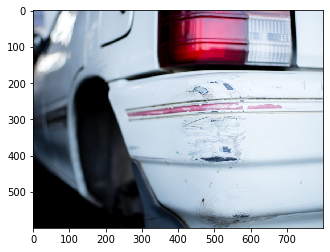

In [0]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
# image_copy = cv2.cvtColor(image_copy, cv2.COLOR_RGB2HSV)

# Display the image copy
plt.imshow(image_copy)


In [0]:
#loading json file
import json
config = json.loads(open('/content/via_region_data.json').read())
config

In [0]:
# config.values() gives 49 dictionaries one for each image
len(config.values())

49

In [0]:
# Mask Generator
def mask_generator(axwai):
  img = np.zeros(im.shape[1:],dtype=np.uint8)
  for item in axwai:
    corns = np.asarray( [item], dtype=np.int32)
    cv2.fillPoly(img, corns, 1)
    cv2.imwrite('/content/masks'+'/'+ '{}_mask.png'.format(filename.split('.')[0]), img)

In [0]:
#Image Coordinates Finder
def coordinate_finder(scratch):# takes in n ditionaries
  # print( scratch)
  coords = []
  for i,item in enumerate(scratch.values()):
    # print('Region', i)
    x = item['shape_attributes']['all_points_x']
    # print('X_coordinate', x)
    y = item['shape_attributes']['all_points_y']
    # print('Y_coordinate', y)
    coord = list(zip(x,y))
    coord = [list(item) for item in coord]
    coords.append(coord)
  # print(coord)
  mask_generator(coords)

In [0]:
# let's take on each image one at a time!
path = Path('/content/train')
core = config.values()
for item in core:
  filename = item['filename']
  # print(filename)
  im = open_image(path/filename)
  # print(im.shape[1:])
  region = item['regions']
  # print(region)
  coordinate_finder(region)
#prints all the imagenames

In [0]:
len(temp.ls())

49

In [0]:
from zipfile import ZipFile
import os

In [0]:
def get_all_file_paths(directory):
  file_paths=[]
  for root, directories, files in os.walk(directory):
    for filename in files:
      filepath = os.path.join(root, filename)
      file_paths.append(filepath)
  return file_paths

In [0]:
def main():
  directory = '/content/masks'
  file_paths = get_all_file_paths(directory)
  print('Following files will be zipped:')
  for file_name in file_paths:
    print(file_name)
  
  with ZipFile('/content/drive/My Drive/mask.zip', 'w') as zip:
    for file in file_paths:
      zip.write(file)
  print("All files zipped successfully!")

In [0]:
if __name__ == '__main__':
  main()